# 1. 라이브러리 불러오기

In [63]:
import tensorflow as tf
import numpy as np 
from tensorflow.keras import datasets,layers, models
from tensorflow.keras.utils import plot_model 
import matplotlib.pyplot as plt

# 2. 데이터 읽어오기

In [104]:
#훈련용, 평가용 데이터 분류해서 가져오기 
# 훈련용(Train), 평가용(test) 
(train_images, train_labels),(test_images,test_labels) = datasets.mnist.load_data() 

In [105]:
#데이터 확인
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [106]:
train_images[45556].shape

(28, 28)

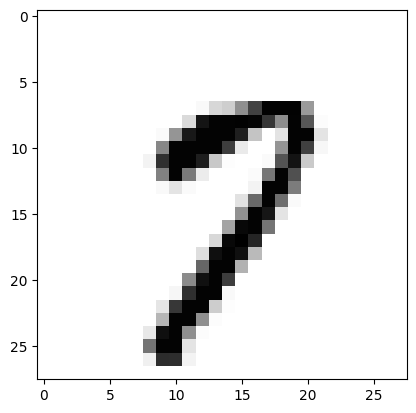

In [107]:
#train images 어떻게 생격을까? train_labels 은 어떻게 생겼을까? 
plt.imshow(train_images[9999], cmap = 'Greys')

In [108]:
train_labels[9999]  #실제 결과

7

In [109]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [110]:
train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [111]:
train_images[9999]
#the values in the reshaped data below have values up till 256. This would be bad when training due to potential skews when plotting in the mean curve
#hence we need to regularize the data values

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [112]:
# 0 -255를 0과 1사이의 실수로 변경 
train_images, test_images = train_images / 255. , test_images / 255. 

In [113]:
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

# 3. 신경망 만들기

In [114]:
#keras 모델 설계
#Feature Learning (특징주출) 
#convolution + RELU 
model = models.Sequential() 
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1))) 
#pooling
model.add(layers.MaxPooling2D((2,2))) # filters of size 2x2 which will half the dataset 
#continue 
model.add(layers.Conv2D(64,(3,3), activation = 'relu')) 
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu')) 
model.add(layers.MaxPooling2D((2,2))) 

In [115]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

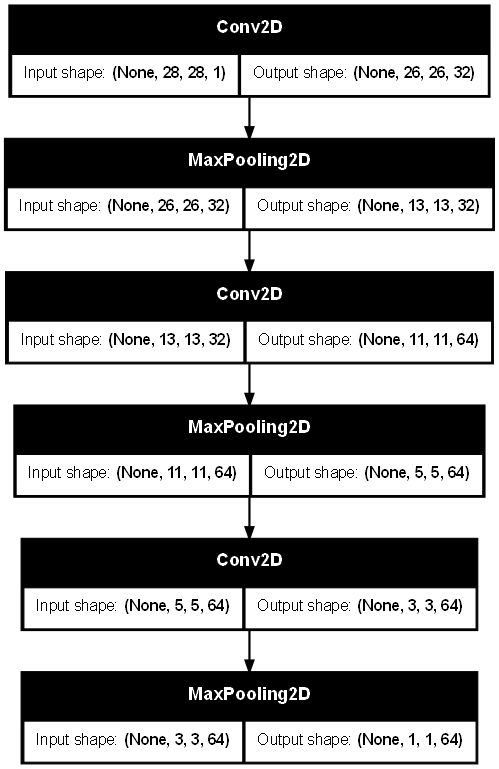

In [116]:
plot_model(model,show_shapes = True, dpi = 80) 

In [117]:
#분류 단계 

#model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax')) #0부터 9까지의 CLASSIFICATION 

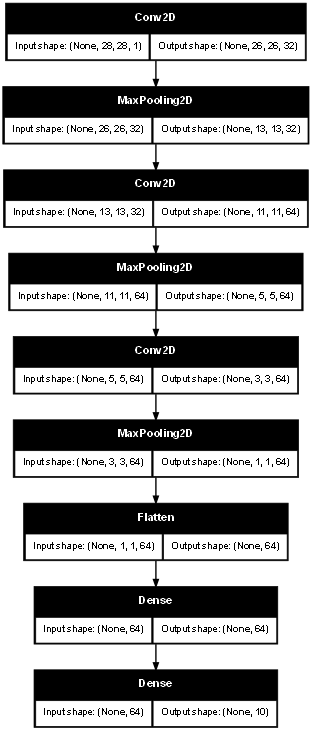

In [118]:
plot_model(model,show_shapes= True, dpi = 50)

# 4. 모델 만들고 학습하기

In [119]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [120]:
history = model.fit(train_images, train_labels, batch_size = 16, epochs  = 50, verbose = 1, validation_data = (test_images, test_labels))

Epoch 1/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.8665 - loss: 0.4081 - val_accuracy: 0.9773 - val_loss: 0.0706
Epoch 2/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9783 - loss: 0.0715 - val_accuracy: 0.9832 - val_loss: 0.0568
Epoch 3/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9840 - loss: 0.0513 - val_accuracy: 0.9827 - val_loss: 0.0580
Epoch 4/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9883 - loss: 0.0375 - val_accuracy: 0.9870 - val_loss: 0.0460
Epoch 5/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9908 - loss: 0.0280 - val_accuracy: 0.9866 - val_loss: 0.0448
Epoch 6/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9921 - loss: 0.0242 - val_accuracy: 0.9868 - val_loss: 0.0487
Epoch 7/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9927 - loss: 0.0204 - val_accuracy: 0.9858 - val_loss: 0.0595
Epoch 8/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9946 - loss: 0

In [122]:
#훈련결과 정보 확인
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

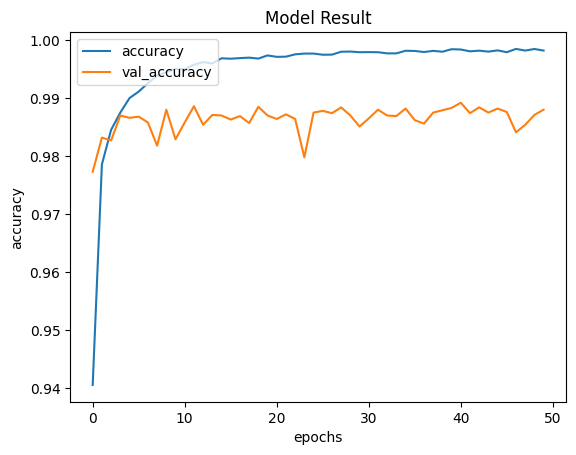

In [128]:
#훈련결과 그래프 표시
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Result')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['accuracy','val_accuracy'], loc ='upper left')
plt.show()

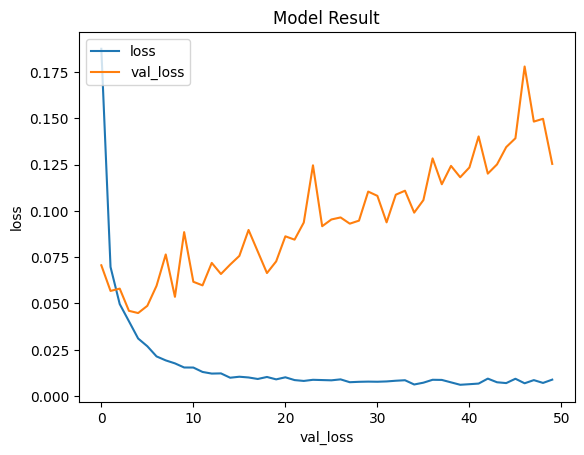

In [129]:
#훈련결과 그래프 표시
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Result')
plt.ylabel('loss')
plt.xlabel('val_loss')
plt.legend(['loss','val_loss'], loc ='upper left')
plt.show()

# 5. 모델 적용하기(예측: PREDICT)

In [130]:
#모델 평가
loss, acc = model.evaluate(test_images, test_labels, verbose = 2)

313/313 - 1s - 3ms/step - accuracy: 0.9880 - loss: 0.1254


In [131]:
acc

0.9879999756813049

In [133]:
#모델 예측 

result = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [134]:
result[5000]

array([0.0000000e+00, 2.5701620e-32, 1.0119587e-28, 1.0000000e+00,
       7.0769895e-37, 1.0861705e-20, 2.3194306e-27, 3.8742488e-29,
       9.3963025e-27, 1.8509077e-32], dtype=float32)

In [135]:
result_value = np.argmax(result[5000])
result_value

3

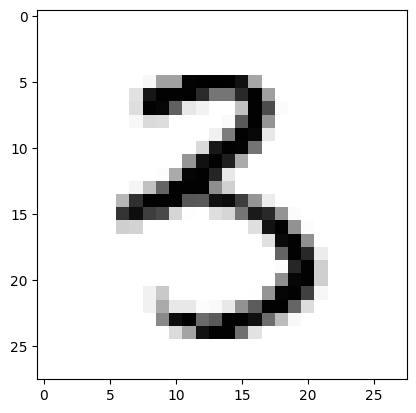

In [136]:
plt.imshow(test_images[5000],cmap = 'Greys')

In [137]:
#모델 저장 

model.save('mnist_cnn_20240517_epoch_50_9880.h5') 

In [138]:
from PIL import Image, ImageOps

In [141]:
image = Image.open('./data/1.jpg')

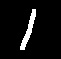

In [143]:
image = image.convert('L')
image

In [146]:
#인공지능에 들어갈 수 있는 상태로 변환 
import PIL
data = np.ndarray(shape =(1,28,28,1), dtype = np.float32)
PIL.Image.ANTIALIAS = PIL.Image.LANCZOS
size = (28,28)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image

In [147]:
image_array = np.array(image)
nor_image_array = (image_array.astype(np.float32) / 255.) 
data = nor_image_array

data

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.01176471, 0.0078

In [148]:
img_data = data.reshape(1,28,28,1)
img_data.shape

(1, 28, 28, 1)

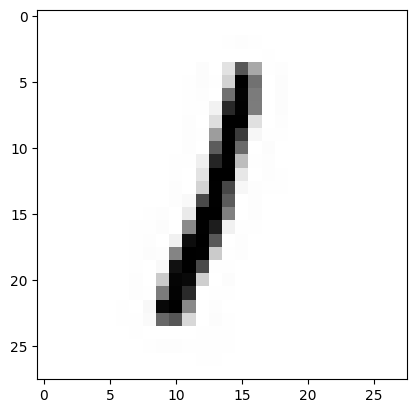

In [150]:
plt.imshow(image, cmap = 'Greys')

In [151]:
#예측 
result = model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [152]:
result

array([[5.8145971e-24, 1.0000000e+00, 1.9836535e-15, 1.6174385e-28,
        1.9955358e-26, 2.1017044e-22, 4.6449659e-26, 2.2425280e-19,
        2.0617834e-16, 6.8146470e-32]], dtype=float32)

In [153]:
my_value = np.argmax(result)
print(my_value)

1
